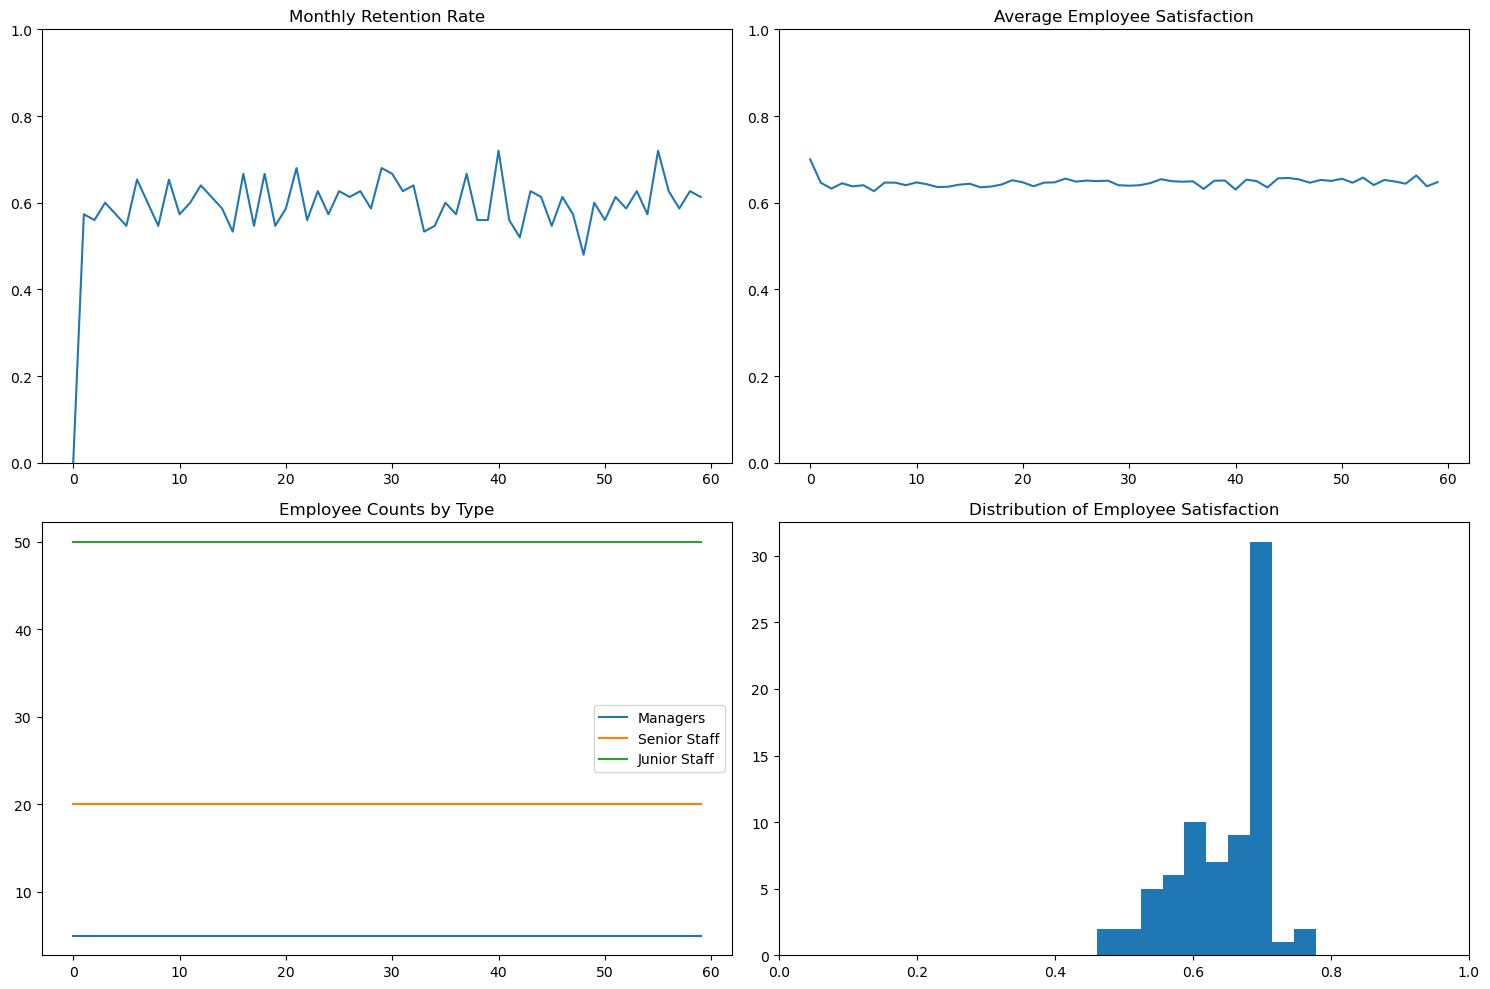

In [1]:
# Create a simple notebook for exploring your model
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to the path to import our modules
sys.path.insert(0, os.path.abspath('..'))

from models.model import OrganizationModel

# Create and run the model
model = OrganizationModel()

# Run for 60 months (5 years)
for i in range(60):
    model.step()

# Get the model data
model_data = model.datacollector.get_model_vars_dataframe()

# Plotting section
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot retention rate
ax[0, 0].plot(model_data['Retention_Rate'])
ax[0, 0].set_title('Monthly Retention Rate')
ax[0, 0].set_ylim([0, 1])

# Plot average satisfaction
ax[0, 1].plot(model_data['Average_Satisfaction'])
ax[0, 1].set_title('Average Employee Satisfaction')
ax[0, 1].set_ylim([0, 1])

# Plot employee counts
ax[1, 0].plot(model_data['Manager_Count'], label='Managers')
ax[1, 0].plot(model_data['Senior_Count'], label='Senior Staff')
ax[1, 0].plot(model_data['Junior_Count'], label='Junior Staff')
ax[1, 0].set_title('Employee Counts by Type')
ax[1, 0].legend()

# Get agent-level data for the last step
agent_data = model.datacollector.get_agent_vars_dataframe().xs(model.schedule.steps - 1, level="Step")

# Create a satisfaction histogram
ax[1, 1].hist(agent_data['Satisfaction'], bins=10)
ax[1, 1].set_title('Distribution of Employee Satisfaction')
ax[1, 1].set_xlim([0, 1])

plt.tight_layout()
plt.show()